In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

C:\Users\20100\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/19 [>.............................] - ETA: 9s - loss: 1.8467 - accuracy: 0.1250
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 1s 13ms/step - loss: 1.7669 - accuracy: 0.1803 - val_loss: 1.6946 - val_accuracy: 0.2286
Epoch 2/1000
 1/19 [>.............................] - ETA: 0s - loss: 1.7219 - accuracy: 0.1875
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 1.6849 - accuracy: 0.2279 - val_loss: 1.5998 - val_accuracy: 0.3528
Epoch 3/1000
 1/19 [>.............................] - ETA: 0s - loss: 1.6576 - accuracy: 0.2969
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\Users\20100\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 0s 4ms/step - loss: 1.5995 - accuracy: 0.3170 - val_loss: 1.5115 - val_accuracy: 0.5168
Epoch 4/1000
 1/19 [>.............................] - ETA: 0s - loss: 1.6011 - accuracy: 0.3203
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 1.5348 - accuracy: 0.3821 - val_loss: 1.4229 - val_accuracy: 0.5590
Epoch 5/1000
 1/19 [>.............................] - ETA: 0s - loss: 1.4562 - accuracy: 0.4062
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 1.4474 - accuracy: 0.4397 - val_loss: 1.3279 - val_accuracy: 0.5776
Epoch 6/1000
 1/19 [>.............................] - ETA: 0s - loss: 1.3921 - accuracy: 0.4531
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 1.3869 - accuracy: 0.4567 - val_loss

Epoch 31/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.7216 - accuracy: 0.6797
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.6797 - accuracy: 0.7360 - val_loss: 0.4244 - val_accuracy: 0.9404
Epoch 32/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.7862 - accuracy: 0.6797
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.7219 - val_loss: 0.4147 - val_accuracy: 0.9578
Epoch 33/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.6517 - accuracy: 0.7812
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.7344 - val_loss: 0.4065 - val_accuracy: 0.9416
Epoch 34/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.6784 - accuracy: 0

 1/19 [>.............................] - ETA: 0s - loss: 0.5778 - accuracy: 0.7812
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.6066 - accuracy: 0.7787 - val_loss: 0.2888 - val_accuracy: 0.9739
Epoch 59/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.6123 - accuracy: 0.7656
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.7779 - val_loss: 0.2921 - val_accuracy: 0.9714
Epoch 60/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.6703 - accuracy: 0.7656
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.5834 - accuracy: 0.7799 - val_loss: 0.2845 - val_accuracy: 0.9739
Epoch 61/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.6770 - accuracy: 0.7109
Epoch 61

 1/19 [>.............................] - ETA: 0s - loss: 0.3939 - accuracy: 0.8359
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.5354 - accuracy: 0.7973 - val_loss: 0.2469 - val_accuracy: 0.9739
Epoch 86/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.5547 - accuracy: 0.7656
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.7961 - val_loss: 0.2448 - val_accuracy: 0.9727
Epoch 87/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4746 - accuracy: 0.8516
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.7940 - val_loss: 0.2407 - val_accuracy: 0.9714
Epoch 88/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.5061 - accuracy: 0.8281
Epoch 88

 1/19 [>.............................] - ETA: 0s - loss: 0.6014 - accuracy: 0.8047
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.5045 - accuracy: 0.8106 - val_loss: 0.2314 - val_accuracy: 0.9739
Epoch 113/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4975 - accuracy: 0.8281
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.8098 - val_loss: 0.2249 - val_accuracy: 0.9752
Epoch 114/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.5653 - accuracy: 0.7734
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4967 - accuracy: 0.8114 - val_loss: 0.2230 - val_accuracy: 0.9727
Epoch 115/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.6094 - accuracy: 0.8047
Ep

Epoch 139/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.5803 - accuracy: 0.8047
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.8264 - val_loss: 0.2049 - val_accuracy: 0.9739
Epoch 140/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4865 - accuracy: 0.7969
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.5137 - accuracy: 0.8119 - val_loss: 0.2090 - val_accuracy: 0.9739
Epoch 141/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4501 - accuracy: 0.8438
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.8301 - val_loss: 0.2161 - val_accuracy: 0.9739
Epoch 142/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4507 - accu

Epoch 166/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4940 - accuracy: 0.7734
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.8243 - val_loss: 0.1961 - val_accuracy: 0.9739
Epoch 167/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8594
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.8363 - val_loss: 0.1959 - val_accuracy: 0.9739
Epoch 168/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4586 - accuracy: 0.8203
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.8218 - val_loss: 0.1952 - val_accuracy: 0.9739
Epoch 169/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.5316 - accu

Epoch 193/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4229 - accuracy: 0.8672
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.8400 - val_loss: 0.1891 - val_accuracy: 0.9752
Epoch 194/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4192 - accuracy: 0.8359
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4450 - accuracy: 0.8396 - val_loss: 0.1908 - val_accuracy: 0.9752
Epoch 195/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.5689 - accuracy: 0.8281
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4561 - accuracy: 0.8421 - val_loss: 0.1910 - val_accuracy: 0.9752
Epoch 196/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4529 - accu

Epoch 220/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8672
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 5ms/step - loss: 0.4256 - accuracy: 0.8492 - val_loss: 0.1827 - val_accuracy: 0.9752
Epoch 221/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.3537 - accuracy: 0.8672
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.8446 - val_loss: 0.1874 - val_accuracy: 0.9752
Epoch 222/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.3796 - accuracy: 0.8438
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.4215 - accuracy: 0.8467 - val_loss: 0.1959 - val_accuracy: 0.9752
Epoch 223/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.5842 - accu

Epoch 247/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.3610 - accuracy: 0.8906
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.3987 - accuracy: 0.8558 - val_loss: 0.1888 - val_accuracy: 0.9739
Epoch 248/1000
 1/19 [>.............................] - ETA: 0s - loss: 0.4156 - accuracy: 0.8281
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
19/19 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8620 - val_loss: 0.1844 - val_accuracy: 0.9752
Epoch 248: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 [==============================] - 0s 3ms/step - loss: 0.1844 - accuracy: 0.9752


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 69ms/step
[1.9806314e-03 8.5575724e-01 1.0849167e-01 2.2129349e-02 1.1310181e-02
 3.3096055e-04]
1


# Confusion matrix

26/26 [==============================] - 0s 1ms/step


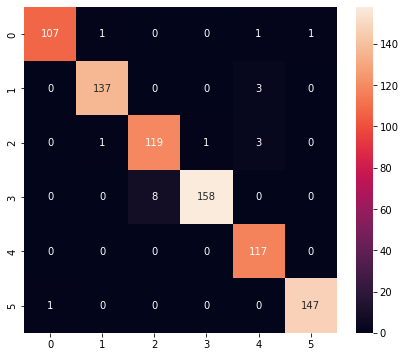

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.99      0.98      0.98       140
           2       0.94      0.96      0.95       124
           3       0.99      0.95      0.97       166
           4       0.94      1.00      0.97       117
           5       0.99      0.99      0.99       148

    accuracy                           0.98       805
   macro avg       0.97      0.98      0.97       805
weighted avg       0.98      0.98      0.98       805



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [16]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\20100\AppData\Local\Temp\tmpfz3vtl31\assets


INFO:tensorflow:Assets written to: C:\Users\20100\AppData\Local\Temp\tmpfz3vtl31\assets


6632

# Inference test

In [17]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [18]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [19]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [20]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [21]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.9806277e-03 8.5575730e-01 1.0849162e-01 2.2129344e-02 1.1310181e-02
 3.3096012e-04]
1
